In [47]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from numpy.linalg import eig

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from numpy.linalg import eig

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree
import plotly.figure_factory as ff
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,roc_curve,accuracy_score,log_loss
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

In [2]:
df=pd.read_csv('audit_risk.csv')
df.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [3]:
#check for Null values.

df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [4]:
df['Money_Value'].fillna(df['Money_Value'].mean(),inplace=True)

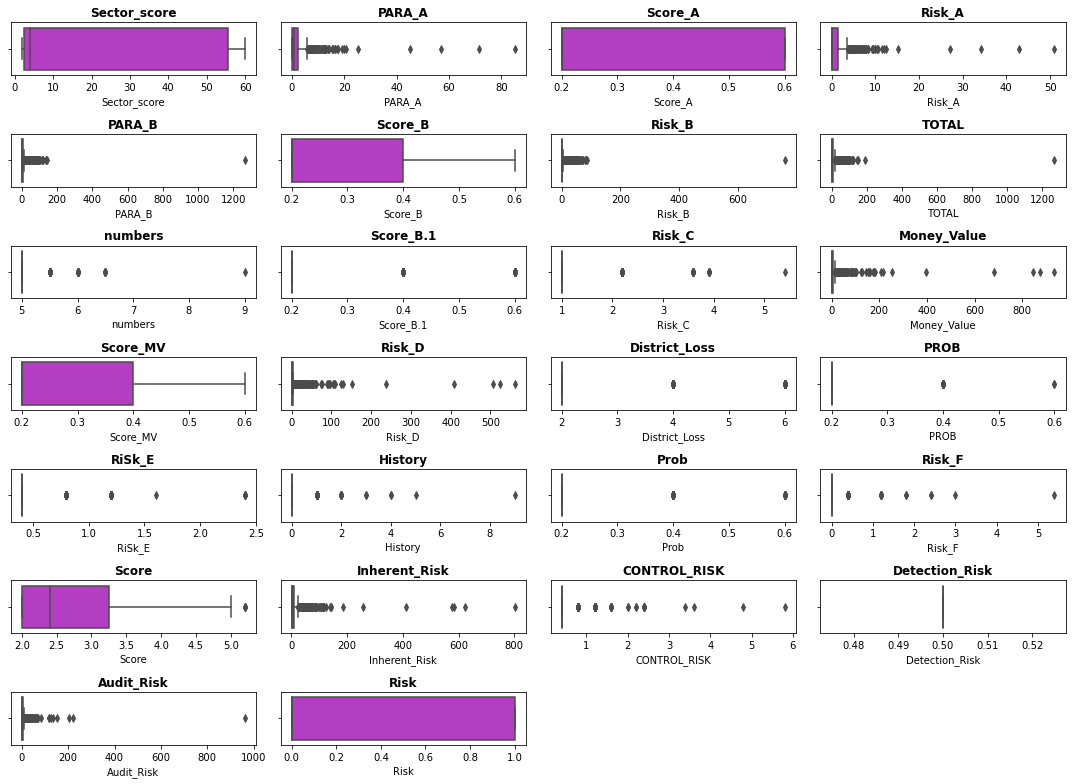

In [5]:
# Check for outliers.

n=1
plt.figure(figsize=(15,11))
for i in df.describe().columns:
    plt.subplot(7,4,n)
    n+=1
    sns.boxplot(df[i],palette='gnuplot2_r')
    plt.title(i,weight='bold')
    plt.tight_layout()

In [6]:
# Capping of Outliers.

for i in df.describe().columns:
    ll,q1,q3,ul=df[i].quantile([0.01,0.25,0.75,0.95])
    LL=q1-1.5*(q3-q1)
    UL=q3+1.5*(q3-q1)
    df[i]=df[i].apply(lambda x: ll if x<LL else ul if x>UL else x)

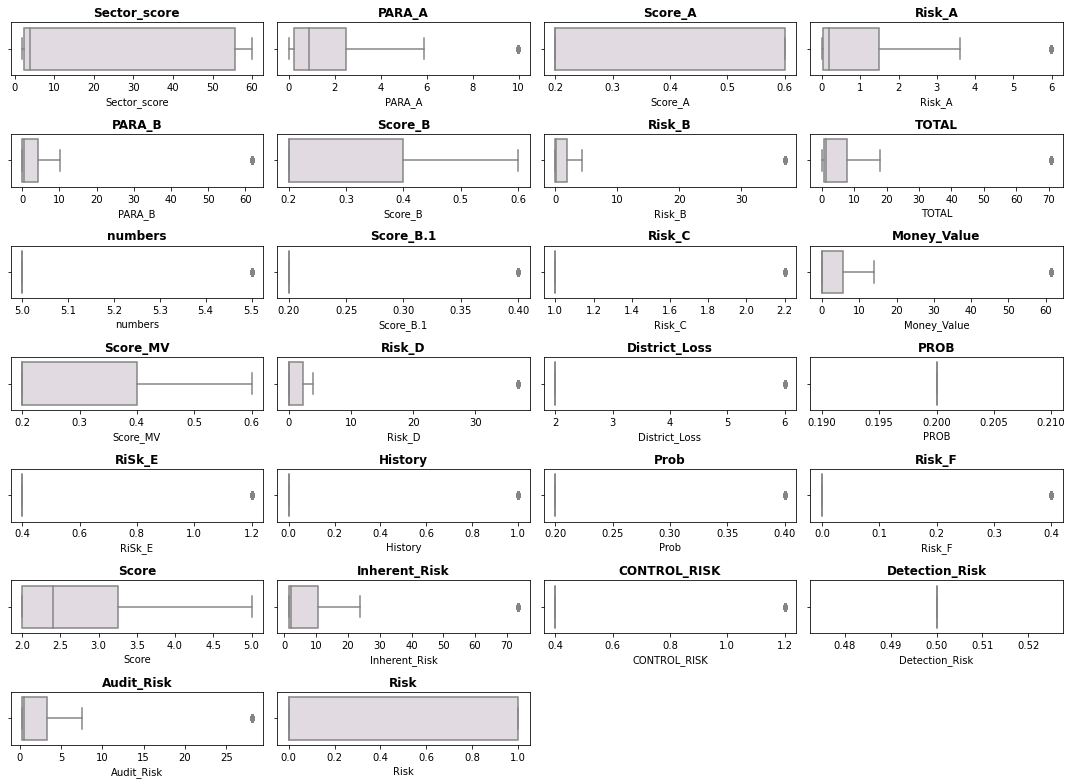

In [7]:
# After removing outliers.

n=1
plt.figure(figsize=(15,11))
for i in df.describe().columns:
    plt.subplot(7,4,n)
    n+=1
    sns.boxplot(df[i],palette='twilight_shifted_r')
    plt.title(i,weight='bold')
    plt.tight_layout()

In [18]:
df.head(1)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.5,0.2,0.5,6.68,5.0,...,0.4,0.0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1


In [8]:
df['LOCATION_ID']=df['LOCATION_ID'].str.replace('LOHARU','0').str.replace('NUH','0').str.replace('SAFIDON','0').astype('int')

In [9]:
# Checking for optimal numbers of  clusters.

wcss=[]
for i in range(1,10):
    k_model=KMeans(n_clusters=i,random_state=10)
    k_model.fit(df)
    wcss.append(k_model.inertia_)

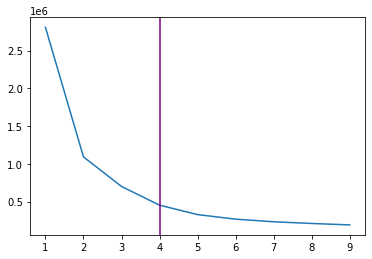

In [10]:
plt.plot(range(1,10),wcss)
plt.axvline(x=4,color='purple')

In [11]:
for i in range(2,10):
    k_model=KMeans(n_clusters=i,random_state=10)
    predict=k_model.fit_predict(df)
    score=silhouette_score(df,predict)
    print('for cluster {},silhouette score is {}'.format(i,score))

for cluster 2,silhouette score is 0.6544612472408543
for cluster 3,silhouette score is 0.5983759204052852
for cluster 4,silhouette score is 0.6396708090152765
for cluster 5,silhouette score is 0.6462956620211058
for cluster 6,silhouette score is 0.6594669832434834
for cluster 7,silhouette score is 0.6644590752747865
for cluster 8,silhouette score is 0.5571867996659853
for cluster 9,silhouette score is 0.5242807379640666


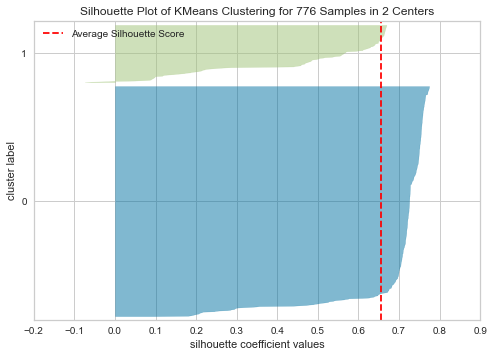

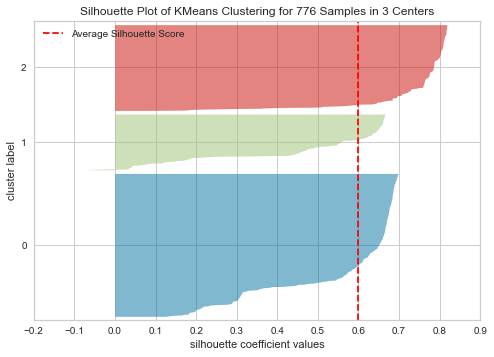

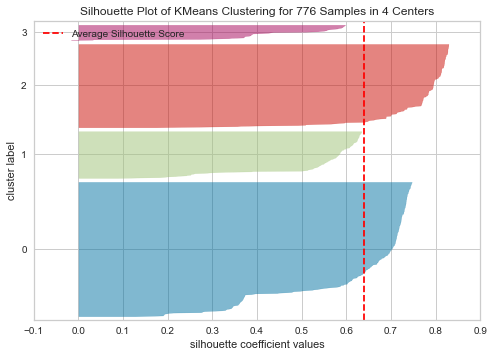

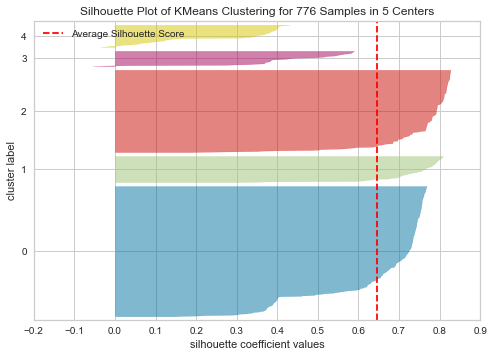

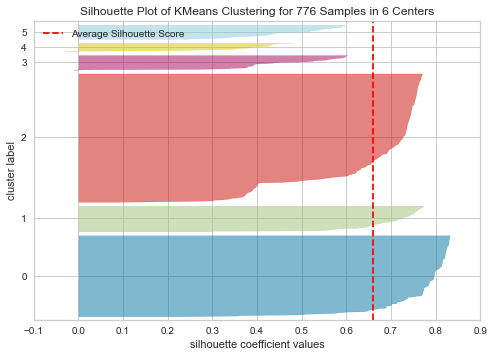

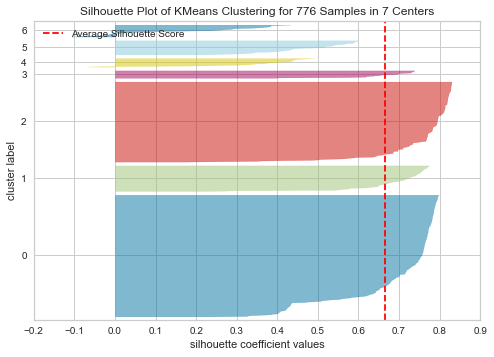

In [12]:
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
X,y=load_credit()
X=df
for i in range(2,8):
    silhouette_visualizer(KMeans(i,random_state=10),X,colors='yellowbrick')

In [13]:
# Agglomerative Model.
link_list=['ward', 'complete', 'average', 'single']
for i in link_list:
    agl_model=AgglomerativeClustering(n_clusters=7,linkage=i)
    predict=agl_model.fit_predict(df)
    score=silhouette_score(df,predict)
    print('for linkage {} ,silhouette score is {}'.format(i,score))

for linkage ward ,silhouette score is 0.6609895547303231
for linkage complete ,silhouette score is 0.5567730299825051
for linkage average ,silhouette score is 0.5199380077750463
for linkage single ,silhouette score is 0.484795687291094


In [14]:
agl_model=AgglomerativeClustering(n_clusters=6,linkage='ward')
agl_model.fit(df)

AgglomerativeClustering(n_clusters=6)

In [15]:
df['Cluster']=agl_model.labels_

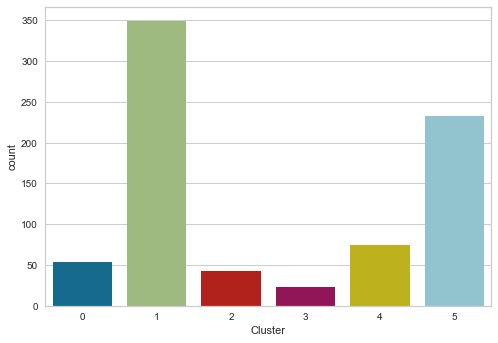

In [16]:
sns.countplot(df['Cluster'])
plt.show()

In [17]:
# PCA for decreases the dimensionality of data.

In [18]:
cov_mat=np.cov(df.T)

In [20]:
# Eigen values and Eigen vector
eig_val,eig_vec=np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vec)

[ 2.48511183e+03+0.00000000e+00j  5.08413991e+02+0.00000000e+00j
  3.67233883e+02+0.00000000e+00j  1.01727447e+02+0.00000000e+00j
  7.37991097e+01+0.00000000e+00j  2.92669711e+01+0.00000000e+00j
  2.79362421e+01+0.00000000e+00j  1.79938361e+01+0.00000000e+00j
  7.67935993e+00+0.00000000e+00j  6.18903457e+00+0.00000000e+00j
  2.04511500e+00+0.00000000e+00j  3.50259866e-01+0.00000000e+00j
  1.74962879e-01+0.00000000e+00j  9.59903511e-02+0.00000000e+00j
  6.87438490e-02+0.00000000e+00j  4.71928297e-02+0.00000000e+00j
  2.19874957e-02+0.00000000e+00j  1.69598177e-02+0.00000000e+00j
  7.95439909e-03+0.00000000e+00j  3.34434532e-03+0.00000000e+00j
  1.38570359e-03+0.00000000e+00j  4.74968720e-04+0.00000000e+00j
  2.51328899e-16+1.63006611e-16j  2.51328899e-16-1.63006611e-16j
  4.47668455e-17+0.00000000e+00j -1.06951882e-19+8.28225111e-19j
 -1.06951882e-19-8.28225111e-19j  0.00000000e+00+0.00000000e+00j]
[[ 2.09480854e-01+0.00000000e+00j -9.72994778e-01+0.00000000e+00j
   5.25187975e-02+0.000

In [23]:
eig_vector=eig_vec[:,range(1,8)]

In [25]:
# PCA Model 
pca_model=PCA(n_components=8,random_state=10)
components=pca_model.fit_transform(df)

In [27]:
df2=pd.DataFrame(data=components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

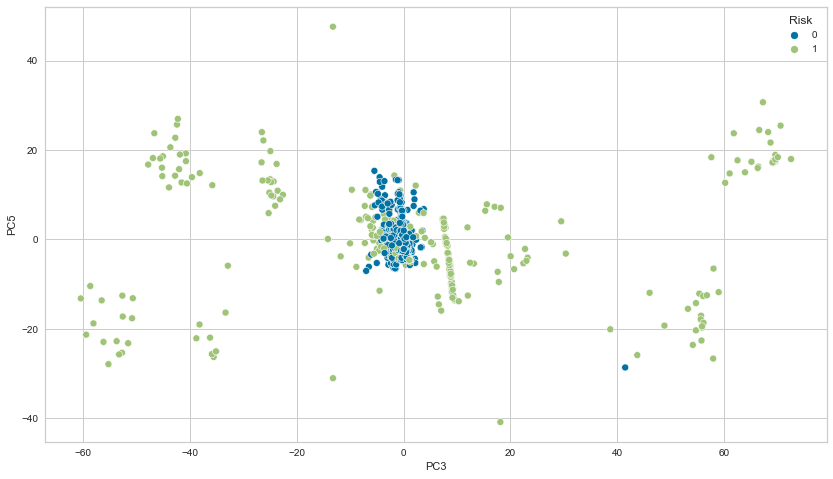

In [29]:
# Scatter of  Clusters.
plt.figure(figsize=(14,8))
target=df['Risk']
visual=pd.concat([df2,target],axis=1)
sns.scatterplot(x='PC3',y='PC5',hue='Risk',data=visual)
plt.show()

In [31]:
df2.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], dtype='object')

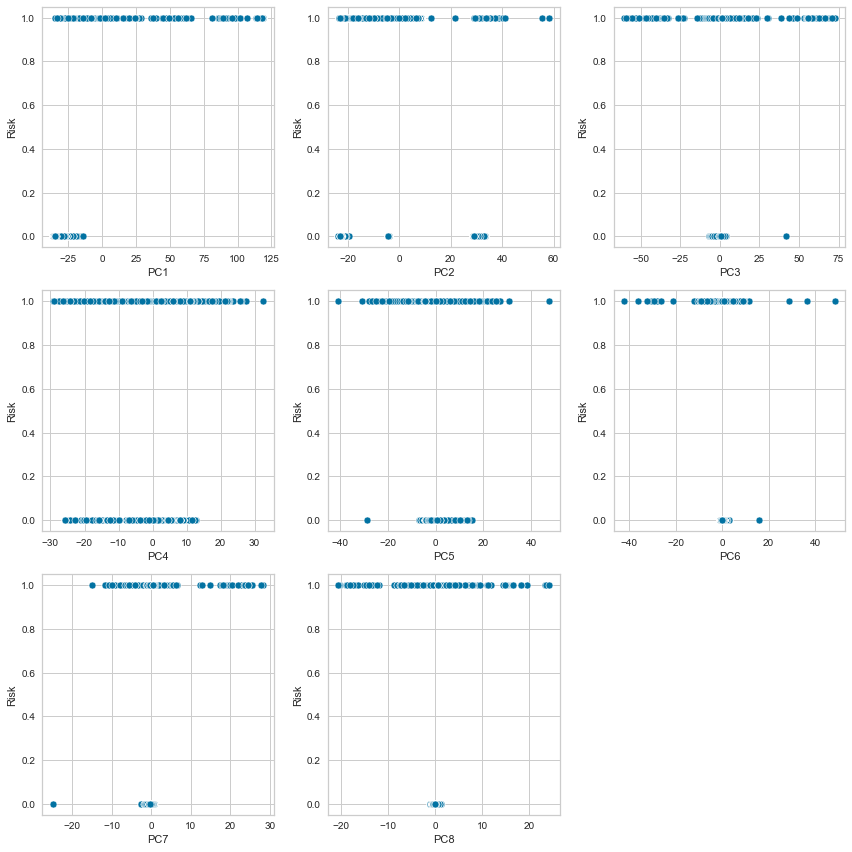

In [33]:
# Scatter plot for all features.
n=1
plt.figure(figsize=(12,12))
for i in df2.columns:
    plt.subplot(3,3,n)
    n+=1
    sns.scatterplot(df2[i],df['Risk'],palette='Spectral')
    plt.tight_layout()

In [34]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Risk']),df['Risk'],test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(543, 27)
(233, 27)
(543,)
(233,)


In [35]:
# Random Forest
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred=random_forest.predict(x_test)

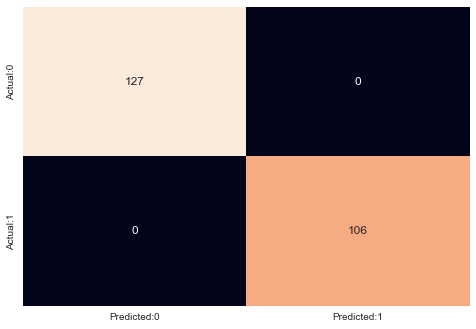

There is no False prediction,Matrix is pure.


In [40]:
# Confusion matrix
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(matrix,annot=True,fmt='d',cbar=False)
plt.show()
print('There is no False prediction,Matrix is pure.')

In [42]:
# Accuracy
print(classification_report(y_test,y_pred))

# Accuracy is equal to one,So Model is not applicable.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       106

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

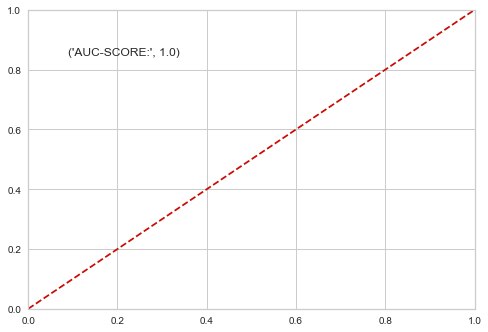

In [50]:
# Roc-Curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.text(x=0.09,y=0.85,s=('AUC-SCORE:',metrics.roc_auc_score(y_test,y_pred)))
plt.grid